## Data Downloading

In [ ]:
from google.colab import files
files.upload()
print("Done")

Done


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle
! ls
! cd PlantVillage/
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

 drive	'kaggle (1).json'   kaggle.json   sample_data
/bin/bash: line 1: cd: PlantVillage/: No such file or directory


In [ ]:
!mkdir data
!mkdir logs

In [ ]:
!kaggle datasets download -d noulam/tomato

100% 740M/743M [00:05<00:00, 157MB/s]
100% 743M/743M [00:05<00:00, 133MB/s]
unzip:  cannot find or open /content/plant-village.zip, /content/plant-village.zip.zip or /content/plant-village.zip.ZIP.


In [ ]:
!unzip /content/tomato.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0011.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___h

In [ ]:
!mkdir /content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images

In [ ]:
! mv "/content/New Plant Diseases Dataset(Augmented)" /content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images

In [ ]:
!mkdir /content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/working

## Data Preparation

In [ ]:
! cp --recursive "/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images" "/content/Images"

In [ ]:
IMG = "/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images"
WORK = "/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/working"
# IMG = "/content/Images"


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
b_size  = 36
img_size = [224, 224]
channel = 3
epoch = 20

In [ ]:
train_data = IMG + '/train'
test_data = IMG + '/valid'

In [ ]:
folders = glob(train_data+'/*')

In [ ]:
folders


['/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___healthy',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/colab_notebook/Deep_lear

In [ ]:
folders = glob(test_data+'/*')
folders

['/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Early_blight',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Late_blight',
 '/content/drive/MyDrive/colab_notebook/Deep_learning/Datasets/PlantVillage/Images/valid/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/colab_notebook/Deep

## Model Creation

In [ ]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=img_size + [3], weights='imagenet', include_top=False)


In [ ]:
len(inception.layers)

311

In [ ]:
# don't train existing weights
for layer in inception.layers[:172]:
    layer.trainable = False

for layer in inception.layers[172:]:
    layer.trainable = True


In [ ]:
x = Flatten()(inception.output)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)


# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 111, 111, 32)         96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 111, 111, 32)         0         ['batch_normalization_94

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_data,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(test_data,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3476 images belonging to 10 classes.


## Training

In [ ]:
checkpoint = ModelCheckpoint(WORK+"/"+"tomato_model_transfer_inception.h5", monitor='loss', verbose=0, save_best_only=True, mode='min')

In [ ]:
history = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[checkpoint]
)

Epoch 1/30
574/574 [==============================] - ETA: 0s - loss: 1.1440 - accuracy: 0.7467

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


574/574 [==============================] - 330s 546ms/step - loss: 1.1440 - accuracy: 0.7467 - val_loss: 0.2822 - val_accuracy: 0.9137
Epoch 2/30
574/574 [==============================] - 319s 556ms/step - loss: 0.2302 - accuracy: 0.9306 - val_loss: 0.1274 - val_accuracy: 0.9583
Epoch 3/30
574/574 [==============================] - 338s 589ms/step - loss: 0.1465 - accuracy: 0.9565 - val_loss: 0.1317 - val_accuracy: 0.9623
Epoch 4/30
574/574 [==============================] - 335s 583ms/step - loss: 0.1185 - accuracy: 0.9644 - val_loss: 0.1677 - val_accuracy: 0.9505
Epoch 5/30
574/574 [==============================] - 332s 577ms/step - loss: 0.1017 - accuracy: 0.9685 - val_loss: 0.0854 - val_accuracy: 0.9741
Epoch 6/30
574/574 [==============================] - 332s 577ms/step - loss: 0.0885 - accuracy: 0.9734 - val_loss: 0.0769 - val_accuracy: 0.9738
Epoch 7/30
574/574 [==============================] - 336s 585ms/step - loss: 0.0782 - accuracy: 0.9766 - val_loss: 0.0674 - val_accura

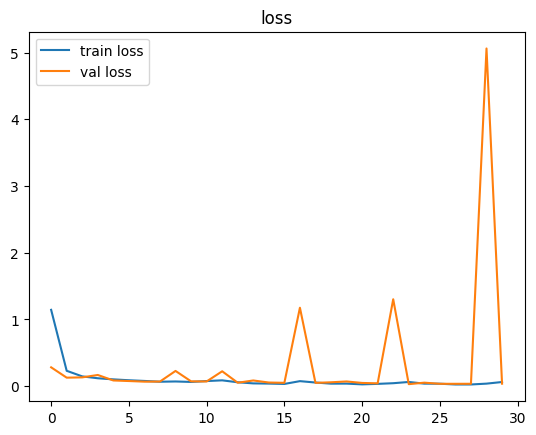

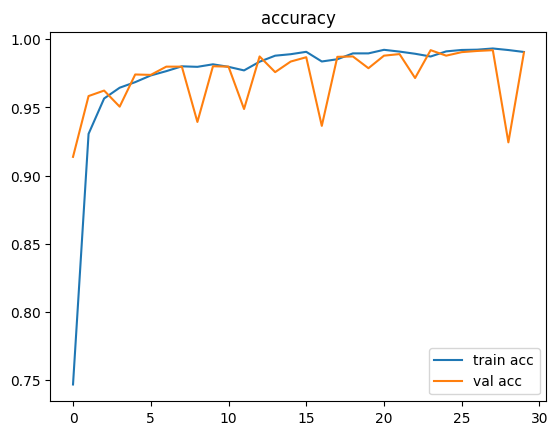

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title('accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Predicting the output
from tensorflow.keras.models import load_model

model = load_model(WORK+"/"+"tomato_model_transfer_inception.h5")
y_pred = model.predict(test_set)


109/109 [==============================] - 14s 118ms/step


In [ ]:
model.save(WORK+"/"+"tomato_model_transfer_inception_latest_manual.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
